In [444]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#Upload from CSVs
meat_pop_path = "New Files/meat_totals.csv"
us_temps_path = "New Files/global_temps_country.csv"
global_temps_path = "New Files/global_temps.csv"

#Read data and results
meat_pop_df = pd.read_csv(meat_pop_path)
us_temps_df = pd.read_csv(us_temps_path)
global_temps_df = pd.read_csv(global_temps_path)


global_temps_df

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1,1,2000,1.461,0.276,7.193,0.465,-4.102,0.395,13.142,0.142
1,2,1,2000,3.098,0.416,9.181,0.604,-2.814,0.626,13.777,0.173
2,3,1,2000,5.492,0.261,11.377,0.327,-0.680,0.610,14.400,0.141
3,4,1,2000,8.223,0.292,13.972,0.342,2.131,0.394,15.170,0.151
4,5,1,2000,11.385,0.357,17.415,0.329,5.179,0.379,15.955,0.159
...,...,...,...,...,...,...,...,...,...,...,...
1387,8,1,2015,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1388,9,1,2015,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1389,10,1,2015,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1390,11,1,2015,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [445]:
#Remove Error Message "https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy"
pd.options.mode.copy_on_write = True 

In [446]:
# Look at Data types and modify if necessary
meat_pop_df.dtypes


Month                      int64
Day                        int64
Year                       int64
beef_commercial          float64
veal_commercial          float64
pork_commercial          float64
lamb_commercial          float64
total_red_commercial     float64
beef_federal             float64
veal_federal             float64
pork_federal             float64
lamb_federal             float64
total_red_federal        float64
broilers_federal         float64
chicken_federal          float64
turkey_federal           float64
total_poultry_federal    float64
total_meat_federal       float64
dtype: object

In [447]:
#Find total red meat overall and make new column
meat_pop_df["total_red_meat"] = meat_pop_df["total_red_commercial"]+meat_pop_df["total_red_federal"]

meat_pop_df.head()

,Month,Day,Year,beef_commercial,veal_commercial,pork_commercial,lamb_commercial,total_red_commercial,beef_federal,veal_federal,pork_federal,lamb_federal,total_red_federal,broilers_federal,chicken_federal,turkey_federal,total_poultry_federal,total_meat_federal,total_red_meat
0,2,1,2024,2168.5,3.6,2371.2,10.9,4554.2,2135.0,3.4,2361.4,9.8,4509.6,3734.3,44.4,423.9,4213.3,8722.9,9063.8
1,1,1,2024,2280.8,3.9,2472.7,10.6,4768.0,2246.1,3.8,2462.4,9.6,4721.9,4051.4,47.4,435.2,4547.6,9269.5,9489.9
2,12,1,2023,2189.9,3.9,2342.0,10.7,4546.4,2159.0,3.7,2332.4,9.5,4504.7,3616.2,41.5,393.0,4063.1,8567.8,9051.1
3,11,1,2023,2280.9,4.3,2388.2,11.2,4684.5,2247.3,4.1,2377.4,10.1,4638.9,3817.3,44.5,449.2,4324.0,8962.9,9323.4
4,10,1,2023,2340.9,4.2,2418.5,11.3,4774.8,2300.8,4.0,2406.2,9.8,4720.8,4177.3,51.0,500.5,4742.1,9462.9,9495.6


In [448]:
#Look for only 1977 and after because null values before that
meat_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed
meat_pop_1977_df = meat_pop_1977_df[["Month", "Year", "total_red_commercial", "total_red_federal", "total_red_meat"]]

#Drop Null Values

meat_pop_1977_df = meat_pop_1977_df.dropna()

meat_pop_1977_df

,Month,Year,total_red_commercial,total_red_federal,total_red_meat
0,2,2024,4554.2,4509.6,9063.8
1,1,2024,4768.0,4721.9,9489.9
2,12,2023,4546.4,4504.7,9051.1
3,11,2023,4684.5,4638.9,9323.4
4,10,2023,4774.8,4720.8,9495.6
...,...,...,...,...,...
562,5,1977,3121.8,2935.0,6056.8
563,4,1977,3194.9,3007.0,6201.9
564,3,1977,3550.8,3334.0,6884.8
565,2,1977,3083.9,2888.0,5971.9


In [449]:
#Drop Null Values to convert Dtypes
us_temps_df = us_temps_df.dropna()


In [450]:
#Change Data Types
us_temps_df["month"] = us_temps_df["month"].astype("int64")
us_temps_df.dtypes

month                              int64
day                                int64
year                               int64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [451]:
#Rename to match meat data frame
us_temps_df = us_temps_df.rename(columns={"year":"Year", "month":"Month"})

us_temps_df.dtypes
# #Filter to 1977
us_temps_1977_df = us_temps_df.loc[us_temps_df["Year"]>=1977]


#reduce
us_temps_1977_df = us_temps_1977_df[["Year", "Month", "AverageTemperature"]]
us_temps_1977_df


,Year,Month,AverageTemperature
893,1977,1,-5.601
894,1977,2,0.271
895,1977,3,2.918
896,1977,4,9.153
897,1977,5,14.556
...,...,...,...
1360,2010,6,19.885
1361,2010,7,22.078
1362,2010,8,21.703
1363,2010,9,17.384


In [452]:
yearly_avg_df = us_temps_1977_df.groupby("Year")["AverageTemperature"].mean()

yearly_avg_df = pd.DataFrame(yearly_avg_df)

yearly_avg_df.tail()

,AverageTemperature
Year,
2009,9.137083
2010,9.505583
2011,9.549917
2012,10.261083
2013,11.297111


In [453]:
#Merge!

us_temps_meat_df = pd.merge(meat_pop_1977_df, us_temps_1977_df, left_on = ["Year", "Month"], right_on = ["Year", "Month"], how = "inner")

us_temps_meat_df

,Month,Year,total_red_commercial,total_red_federal,total_red_meat,AverageTemperature
0,9,2013,3937.0,3896.4,7833.4,18.273
1,8,2013,4202.4,4161.3,8363.7,21.168
2,7,2013,4158.2,4117.8,8276.0,22.074
3,6,2013,3854.5,3817.5,7672.0,20.198
4,5,2013,4150.0,4111.6,8261.6,14.073
...,...,...,...,...,...,...
428,5,1977,3121.8,2935.0,6056.8,14.556
429,4,1977,3194.9,3007.0,6201.9,9.153
430,3,1977,3550.8,3334.0,6884.8,2.918
431,2,1977,3083.9,2888.0,5971.9,0.271


In [454]:
outliers_df = us_temps_meat_df.loc[us_temps_meat_df["total_red_meat"]>10000]

filtered_df = us_temps_meat_df[us_temps_meat_df["total_red_meat"]<=10000]

filtered_df


,Month,Year,total_red_commercial,total_red_federal,total_red_meat,AverageTemperature
0,9,2013,3937.0,3896.4,7833.4,18.273
1,8,2013,4202.4,4161.3,8363.7,21.168
2,7,2013,4158.2,4117.8,8276.0,22.074
3,6,2013,3854.5,3817.5,7672.0,20.198
4,5,2013,4150.0,4111.6,8261.6,14.073
...,...,...,...,...,...,...
428,5,1977,3121.8,2935.0,6056.8,14.556
429,4,1977,3194.9,3007.0,6201.9,9.153
430,3,1977,3550.8,3334.0,6884.8,2.918
431,2,1977,3083.9,2888.0,5971.9,0.271


In [455]:
#Find Averages of total_red_meat
average_df = filtered_df.groupby("Year")["total_red_meat"].sum()

average_df = pd.DataFrame(average_df)

average_df.head()

,total_red_meat
Year,
1977,75952.9
1978,74168.2
1979,72539.7
1980,75201.6
1981,75472.7


In [456]:
#Merge Temp Avg and Meat Sum
merged_year_red = pd.merge(yearly_avg_df, average_df, how = "inner", on = ["Year"])

merged_year_red.head()

,AverageTemperature,total_red_meat
Year,,
1977,9.269833,75952.9
1978,8.751417,74168.2
1979,8.571583,72539.7
1980,9.135500,75201.6
1981,9.721500,75472.7


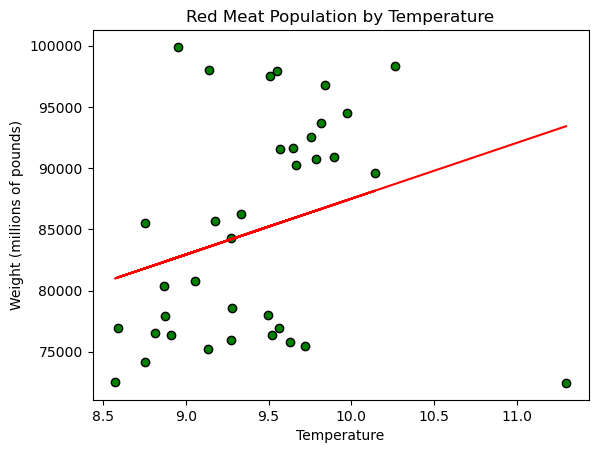

In [457]:
#Scatter plot
x = merged_year_red["AverageTemperature"]
y = merged_year_red["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Temperature")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Temperature")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

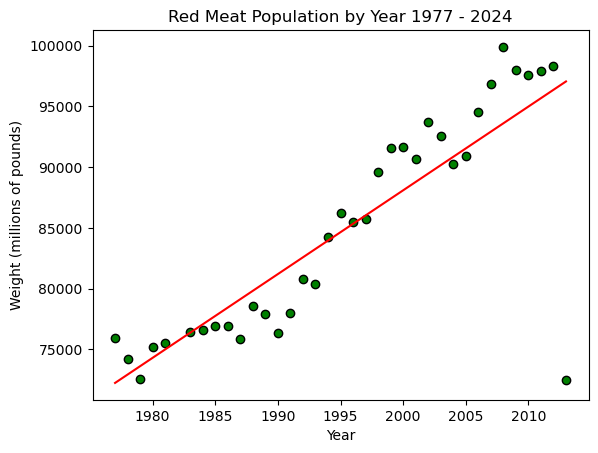

In [458]:
#Scatter plot
x = average_df.index
y = average_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Year 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()


In [459]:
#Find Averages of temp

#average_1_df = filtered_df.loc[filtered_df["Month"]==6]


#average_1_df = pd.DataFrame(average_1_df)

average_1_df = average_1_df[["total_red_meat", "AverageTemperature"]]

average_1_df.head()

,total_red_meat,AverageTemperature
3,7672.0,20.198
15,8007.4,19.954
27,8395.8,19.578
39,8309.9,19.885
51,8280.5,18.962


In [460]:
#Merge averages tables
# merged_averages_df = pd.merge(average_df, average_1_df, how="inner", on=["Year", "Month"])

# merged_averages_df.head()

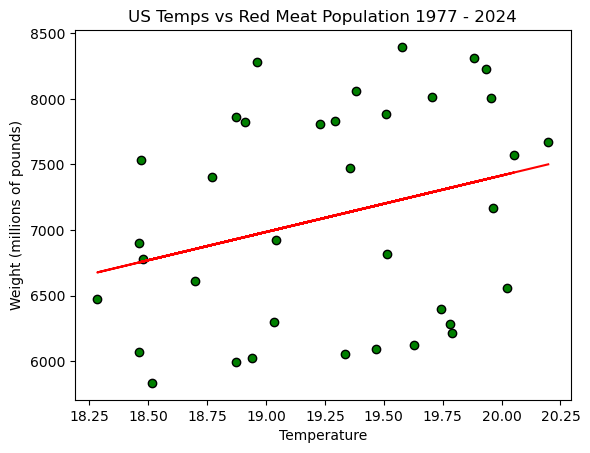

In [461]:
#Scatter plot
x = average_1_df["AverageTemperature"]
y = average_1_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Temperature")
plt.ylabel("Weight (millions of pounds)")
plt.title("US Temps vs Red Meat Population 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(4, 5300),fontsize=15,color="red")

plt.show()

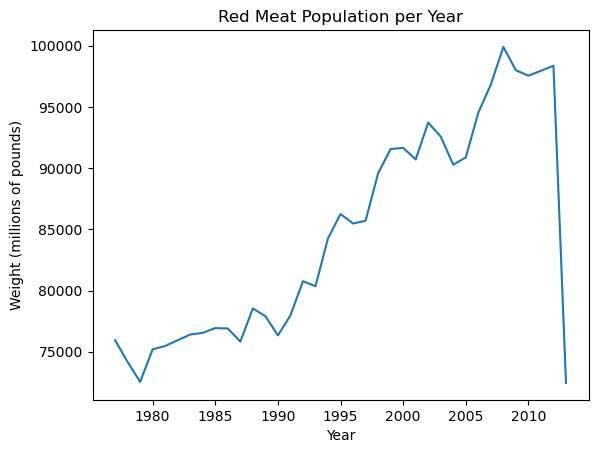

In [462]:
#Line Graph Meat by Year

#Line plot
x = average_df.index
y = average_df["total_red_meat"]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Red Meat Population per Year")
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.show()

In [463]:
#Clean Global Temps
#Drop Null
global_temps_df = global_temps_df.dropna()

global_temps_df

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1,1,2000,1.461,0.276,7.193,0.465,-4.102,0.395,13.142,0.142
1,2,1,2000,3.098,0.416,9.181,0.604,-2.814,0.626,13.777,0.173
2,3,1,2000,5.492,0.261,11.377,0.327,-0.680,0.610,14.400,0.141
3,4,1,2000,8.223,0.292,13.972,0.342,2.131,0.394,15.170,0.151
4,5,1,2000,11.385,0.357,17.415,0.329,5.179,0.379,15.955,0.159
...,...,...,...,...,...,...,...,...,...,...,...
1387,8,1,2015,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1388,9,1,2015,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1389,10,1,2015,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1390,11,1,2015,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [397]:
july_df = global_temps_df.loc[global_temps_df["Month"]==7]
#july_df = july_df.sort_values(by="Year")

august_df = global_temps_df.loc[global_temps_df["Month"]==8]

june_df = global_temps_df.loc[global_temps_df["Month"]==6]

july_df

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
6,7,1,2000,14.171,0.345,19.897,0.372,8.095,0.311,16.785,0.154
18,7,1,2001,14.339,0.350,20.340,0.430,8.161,0.374,16.718,0.158
30,7,1,2002,14.231,0.356,20.200,0.536,7.965,0.339,16.690,0.145
42,7,1,2003,13.992,0.366,19.787,0.452,7.870,0.364,16.496,0.146
54,7,1,2004,13.836,0.296,19.678,0.647,7.777,0.340,16.525,0.134
...,...,...,...,...,...,...,...,...,...,...,...
1338,7,1,2011,15.482,0.113,21.320,0.131,9.684,0.110,17.568,0.062
1350,7,1,2012,15.076,0.076,21.006,0.079,9.229,0.113,17.450,0.060
1362,7,1,2013,15.003,0.126,20.737,0.100,9.330,0.153,17.503,0.068
1374,7,1,2014,14.873,0.078,20.711,0.091,9.112,0.135,17.508,0.061


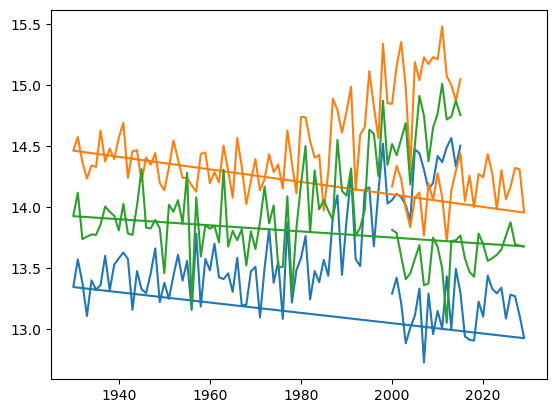

In [439]:
fig = plt.figure()

for frame in [june_df, july_df, august_df]:
    plt.plot(frame["Year"], frame["LandAverageTemperature"])

plt.show()

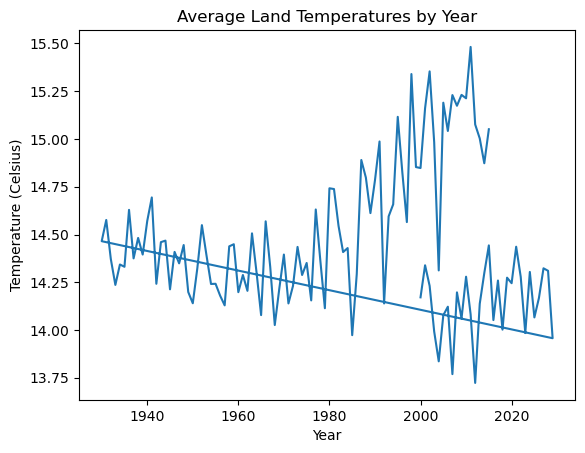

In [440]:
#Line plot
x = july_df["Year"]
y = july_df["LandAverageTemperature"]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Average Land Temperatures by Year")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()


In [441]:
mean_df = global_temps_df.groupby("Year")["LandAverageTemperature"].mean()

mean_df = pd.DataFrame(mean_df)
mean_df.tail()
        

,LandAverageTemperature
Year,
2025,8.534417
2026,8.728833
2027,8.522083
2028,8.632167
2029,8.242417


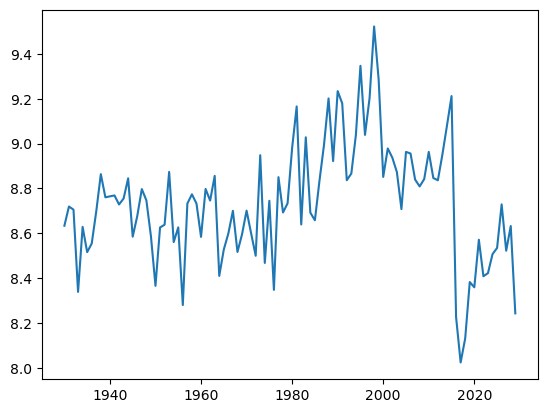

In [442]:
#Line plot
x = mean_df.index
y = mean_df["LandAverageTemperature"]

fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()


In [402]:
meat_pop_df.head()

,Month,Day,Year,beef_commercial,veal_commercial,pork_commercial,lamb_commercial,total_red_commercial,beef_federal,veal_federal,pork_federal,lamb_federal,total_red_federal,broilers_federal,chicken_federal,turkey_federal,total_poultry_federal,total_meat_federal,total_red_meat
0,2,1,2024,2168.5,3.6,2371.2,10.9,4554.2,2135.0,3.4,2361.4,9.8,4509.6,3734.3,44.4,423.9,4213.3,8722.9,9063.8
1,1,1,2024,2280.8,3.9,2472.7,10.6,4768.0,2246.1,3.8,2462.4,9.6,4721.9,4051.4,47.4,435.2,4547.6,9269.5,9489.9
2,12,1,2023,2189.9,3.9,2342.0,10.7,4546.4,2159.0,3.7,2332.4,9.5,4504.7,3616.2,41.5,393.0,4063.1,8567.8,9051.1
3,11,1,2023,2280.9,4.3,2388.2,11.2,4684.5,2247.3,4.1,2377.4,10.1,4638.9,3817.3,44.5,449.2,4324.0,8962.9,9323.4
4,10,1,2023,2340.9,4.2,2418.5,11.3,4774.8,2300.8,4.0,2406.2,9.8,4720.8,4177.3,51.0,500.5,4742.1,9462.9,9495.6


In [412]:
#POULTRY Look for only 1977 and after because null values before that
poul_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed


poul_pop_1977_df = poul_pop_1977_df[["Year", "total_poultry_federal"]]

poul_pop_1977_df

,Year,total_poultry_federal
0,2024,4213.3
1,2024,4547.6
2,2023,4063.1
3,2023,4324.0
4,2023,4742.1
...,...,...
562,1977,969.7
563,1977,877.1
564,1977,918.9
565,1977,763.9


In [416]:
#Merge poultry and temps
poul_temps_df = pd.merge(poul_pop_1977_df, us_temps_1977_df, how="inner", on=["Year"])

poul_temps_df.tail()

,Year,total_poultry_federal,Month,AverageTemperature
5287,1977,831.5,8,20.909
5288,1977,831.5,9,17.025
5289,1977,831.5,10,9.815
5290,1977,831.5,11,2.694
5291,1977,831.5,12,-2.326


In [414]:
#Find Averages of total_red_meat
average_1_df = poul_temps_df.groupby("Year")["total_poultry_federal"].mean()

average_1_df = pd.DataFrame(average_1_df)

average_1_df.head()

,total_poultry_federal
Year,
1977,974.716667
1978,1037.283333
1979,1144.425000
1980,1186.075000
1981,1254.858333


In [ ]:
average_df = filtered_df.groupby("Year")["total_poultry_federal"].sum()

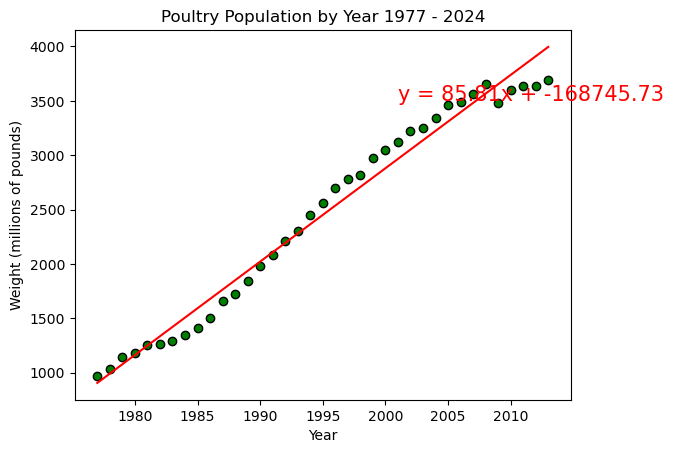

In [415]:
#Scatter plot
x = average_1_df.index
y = average_1_df["total_poultry_federal"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Poultry Population by Year 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(2001, 3500),fontsize=15,color="red")

plt.show()


In [374]:
#Poultry vs temps
poul_temps_short = poul_temps_df.loc[poul_temps_df["Month"]==6]

poul_temps_short = poul_temps_short[["Month", "Year", "AverageTemperature"]]

poul_temps_short 

#Merge temp and averages

poul_temps_df = pd.merge(average_1_df, poul_temps_short, how="inner", on="Year")

poul_temps_df

,Year,total_poultry_federal,Month,AverageTemperature
0,2001,3122.975000,6,19.357
1,2002,3218.675000,6,20.052
2,2003,3252.291667,6,18.871
3,2004,3346.250000,6,19.228
4,2005,3460.408333,6,19.511
5,2006,3485.250000,6,19.933
6,2007,3561.816667,6,19.705
7,2008,3652.625000,6,19.381
8,2009,3482.225000,6,18.962
9,2010,3598.116667,6,19.885


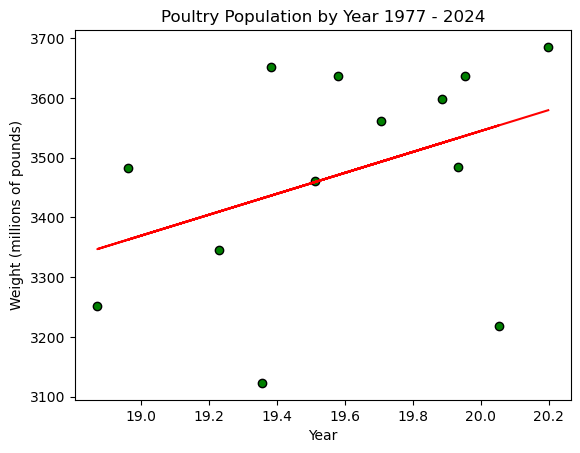

In [375]:
#Scatter plot
x = poul_temps_df["AverageTemperature"]
y = poul_temps_df["total_poultry_federal"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Poultry Population by Year 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(1980, 7500),fontsize=15,color="red")

plt.show()

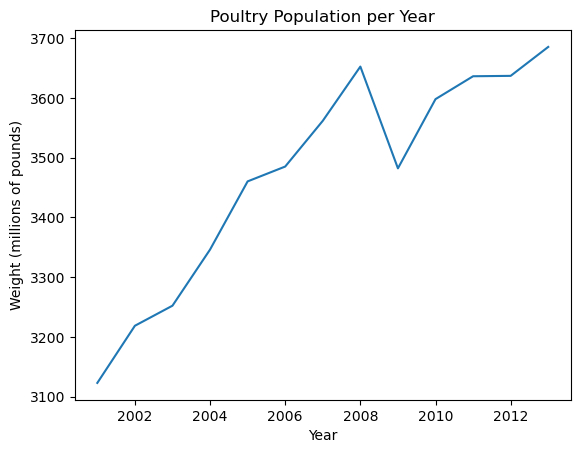

In [376]:
#Line plot
x = average_1_df.index
y = average_1_df["total_poultry_federal"]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.title("Poultry Population per Year")
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.show()